# Hani Musyaffa Hadi
# Kelompok 2
# Batch 32

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# 1. Bagaimana tren target usia dari tahun ke tahun?

In [ ]:
df_netflix = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/1. Data Science - Digital Skola/Project 2/Dataset/clean_netflix_imdb (1).xlsx')
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,budget_x,revenue,score,genre,year_added,month_added,release_day_gap,first_country,target_ages,duration_min
0,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,100000000.0,369861963.8,71,"['Comedies', 'Dramas']",2021,9,7,United States,Teens,104
1,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,75000000.0,272222420.0,64,['Comedies'],2021,9,4106,United States,Teens,103
2,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,3500000.0,27704111.0,63,"['Horror Movies', 'Sci-Fi & Fantasy']",2021,9,3112,United States,Teens,97
3,s30,Movie,paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,...,40000000.0,16340767.0,57,['Thrillers'],2021,9,2908,United States,Teens,106
4,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,...,12000000.0,482947378.0,77,"['Action & Adventure', 'Classic Movies', 'Dram...",2021,9,16731,United States,Older Kids,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,s8767,Movie,xxx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,...,70000000.0,267200000.0,59,"['Action & Adventure', 'Sports Movies']",2019,1,5934,United States,Teens,124
940,s8768,Movie,xxx: state of the union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,...,60000000.0,71073932.0,50,['Action & Adventure'],2019,1,4996,United States,Teens,101
941,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,90000000.0,204313400.0,57,"['Action & Adventure', 'Comedies']",2019,9,4034,United States,Adults,113
942,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,12000000.0,22750356.0,58,"['Comedies', 'Dramas', 'Independent Movies']",2019,11,2862,United States,Adults,94


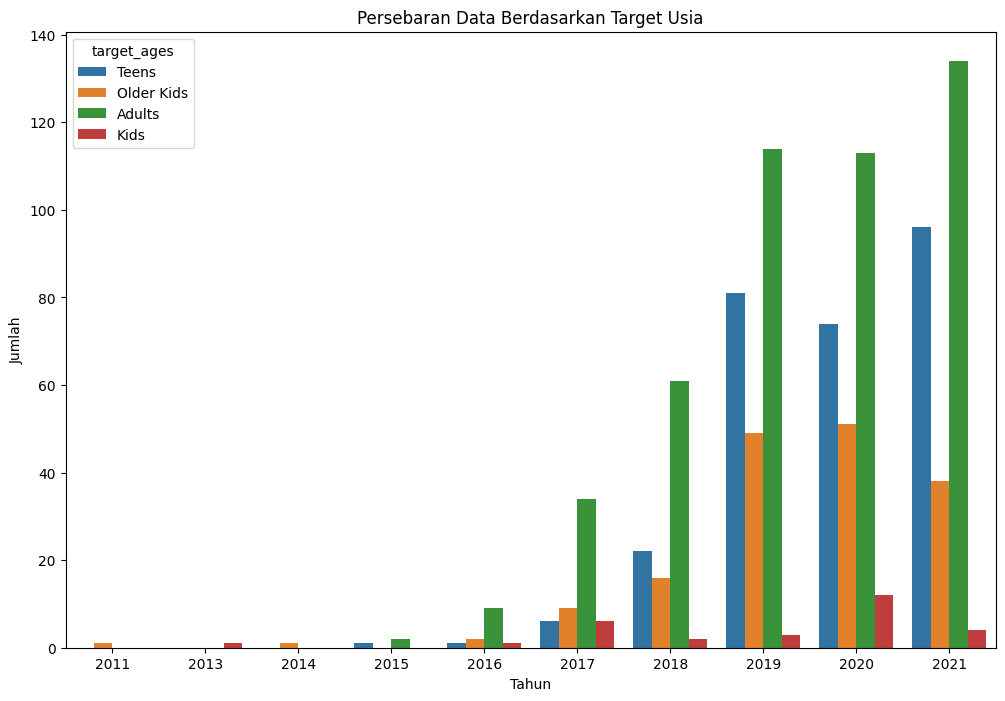

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='year_added', hue='target_ages', data=df_netflix)
plt.title('Persebaran Data Berdasarkan Target Usia')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()


plt.show()

# 2. Bagaimana tren IMDb score dari tahun ke tahun berdasarkan target usia?

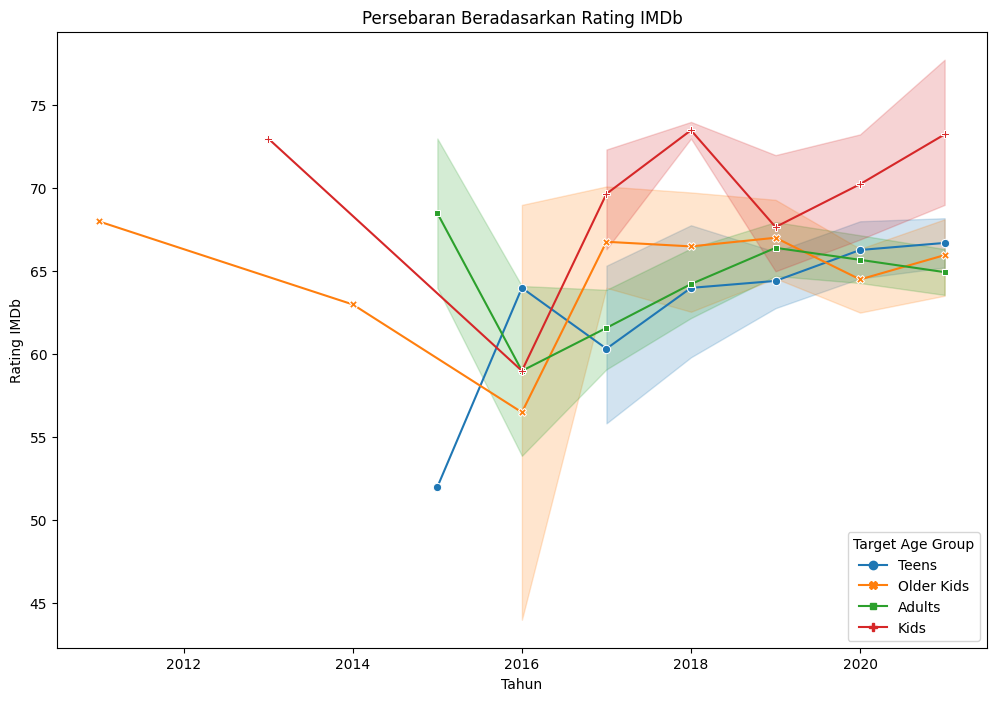

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='year_added', y='score', hue='target_ages', style='target_ages', data=df_netflix, markers=True, dashes=False)

plt.title('Persebaran Beradasarkan Rating IMDb')
plt.xlabel('Tahun')
plt.ylabel('Rating IMDb')
plt.legend(title='Target Age Group', loc='lower right')
plt.show()

#3. Siapakah top 10 sutradara yang filmnya paling banyak di netflix?

In [ ]:
directors_df = df_netflix['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('director')
df_directors = df_netflix.drop('director', axis=1).join(directors_df)
top_directors = df_directors['director'].value_counts().head(10)
top_directors

Steven Spielberg     9
Quentin Tarantino    6
McG                  6
John G. Avildsen     6
Martin Campbell      6
Jesse V. Johnson     5
Ron Howard           5
Robert Luketic       5
David Fincher        5
Martin Scorsese      5
Name: director, dtype: int64

In [ ]:
df_dir = pd.DataFrame(top_directors)
df_dir = df_dir.reset_index(level = 0, drop = False)
df_dir.to_csv('top_directors.csv', index_label=False)

In [ ]:
top_directors.to_csv('/content/drive/MyDrive/Colab Notebooks/1. Data Science - Digital Skola/Project 2/cleansing/top_directors')

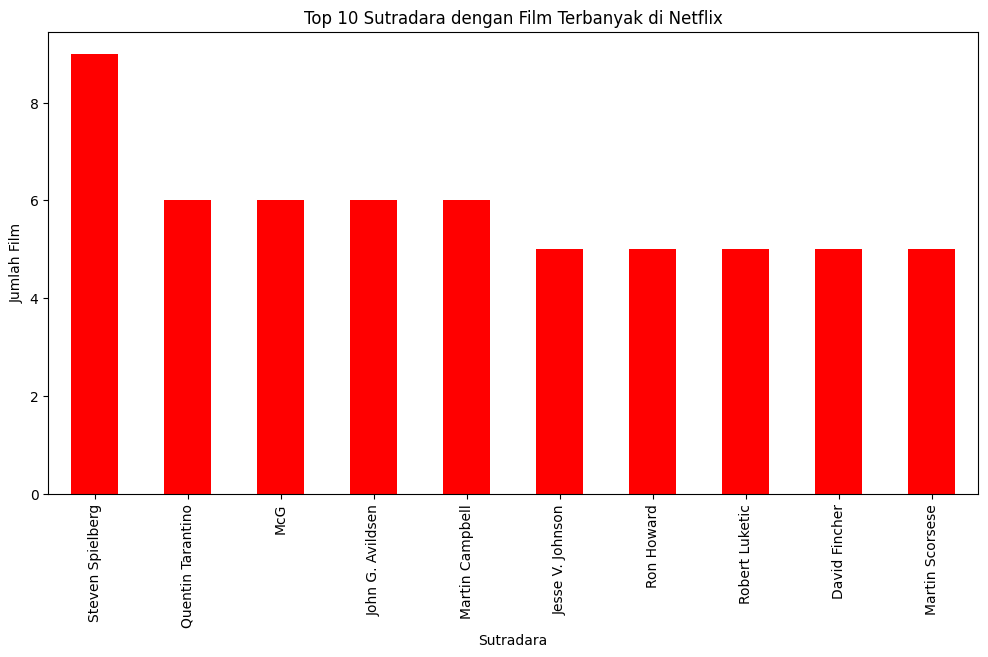

In [ ]:
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='red')
plt.title('Top 10 Sutradara dengan Film Terbanyak di Netflix')
plt.xlabel('Sutradara')
plt.ylabel('Jumlah Film')
plt.show()

# 4. Buatkan wordcloud sutradara berdasarkan budget film

In [ ]:
director_budget_dict = {}
for index, row in df_netflix.iterrows():
    directors = row['director'].split(', ')
    budget = row['budget_x']
    for director in directors:
        director_budget_dict[director] = director_budget_dict.get(director, 0) + budget
director_budget_dict

{'Theodore Melfi': 100000000.0,
 'Dennis Dugan': 297000000.0,
 'Scott Stewart': 29500000.0,
 'Robert Luketic': 176000000.0,
 'Steven Spielberg': 682000000.0,
 'Jeannot Szwarc': 20000000.0,
 'Joseph Sargent': 23000000.0,
 'Daniel Espinosa': 85000000.0,
 'Antoine Fuqua': 190000000.0,
 'Cedric Nicolas-Troyan': 37800000.0,
 'Alice Waddington': 6000000.0,
 'Mark Rosman': 19000000.0,
 'Neill Blomkamp': 79000000.0,
 'Phillip Noyce': 147000000.0,
 'Renny Harlin': 157000000.0,
 'Anthony Minghella': 120000000.0,
 'Simon Wincer': 65000000.0,
 'Spike Lee': 6000000.0,
 'Sebastián Schindel': 92400000.0,
 'Steven C. Miller': 80000000.0,
 'Richard LaGravenese': 51000000.0,
 'Martin Campbell': 472000000.0,
 'Reginald Hudlin': 14500000.0,
 'Jim Henson': 40000000.0,
 'Gary Winick': 30000000.0,
 'Danishka Esterhazy': 53740900.0,
 'Tim Burton': 280000000.0,
 'Kinka Usher': 68000000.0,
 'Sergio Leone': 30000000.0,
 "Matthew O'Callaghan": 39120168.6,
 'Todd Wilderman': 39120168.6,
 'Bobby Farrelly': 15500000

In [ ]:
director_budget_dict_df = pd.DataFrame(list(director_budget_dict.items()), columns=['director', 'budget'])
director_budget_dict_df['budget'] = director_budget_dict_df['budget'] / 1000000
director_budget_dict_df.to_csv('director_budget.csv')

In [ ]:
top_directors.to_csv('/content/drive/MyDrive/Colab Notebooks/1. Data Science - Digital Skola/Project 2/cleansing/director_budget')

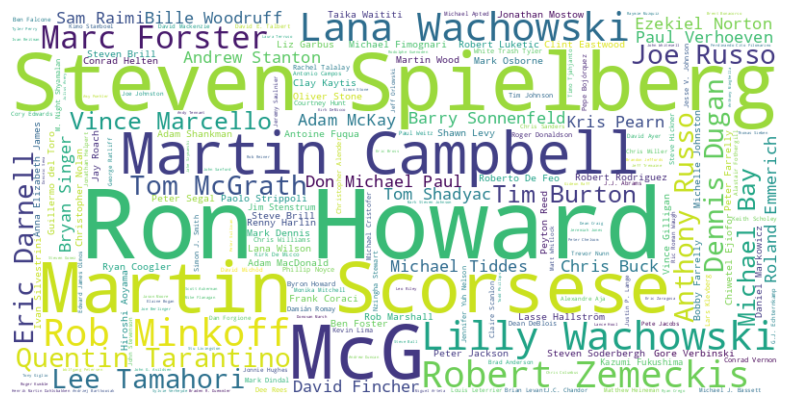

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(director_budget_dict_df['director'], director_budget_dict_df['budget'])))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#5. Apakah ada artis yang sering bekerja sama dengan sutradara di lebih dari 1 film?

In [ ]:
df_colab = df_netflix.copy()
df_colab['cast'] = df_colab['cast'].apply(lambda x: [actor.strip() for actor in x.split(',')])
df_colab['director'] = df_colab['director'].apply(lambda x: [director.strip() for director in x.split(',')])
df_colab['director_cast_pairs'] = df_colab.apply(lambda row: [(director, actor) for director in row['director'] for actor in row['cast']], axis=1)
all_pairs = [pair for sublist in df_colab['director_cast_pairs'] for pair in sublist]
director_cast_df = pd.DataFrame(all_pairs, columns=['director', 'actor'])
pair_counts = director_cast_df.value_counts()
result = pair_counts[pair_counts > 1]
result

director          actor              
John G. Avildsen  Ralph Macchio          4
Michael Tiddes    Marlon Wayans          4
Jesse V. Johnson  Scott Adkins           4
John G. Avildsen  Martin Kove            4
Lana Wachowski    Hugo Weaving           4
                                        ..
Lasse Hallström   Helen Mirren           2
Louis Leterrier   Tine Stapelfeldt       2
Vic Armstrong     Cassi Thomson          2
                  Chad Michael Murray    2
Kris Pearn        Terry Crews            2
Length: 419, dtype: int64

In [ ]:
res_colab = pd.DataFrame(result)
res_colab = res_colab.reset_index(level = 0, drop = False)
res_colab = res_colab.rename(columns={0:'count'})
res_colab = res_colab.reset_index(level = 0, drop = False)
res_colab.to_csv('cast_colab.csv')

In [ ]:
top_directors.to_csv('/content/drive/MyDrive/Colab Notebooks/1. Data Science - Digital Skola/Project 2/cleansing/cast_colab')

# 6. Buatkan peta negara yang nilainya berdasarkan bahasa asli film?

In [ ]:
gdf = gpd.GeoDataFrame(df_netflix, geometry=gpd.points_from_xy([0] * len(df_netflix['country']), [0] * len(df_netflix['country'])))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(gdf, left_on='name', right_on='country', how='left')
language_counts = merged['orig_lang'].value_counts().reset_index()
language_counts.columns = ['orig_lang', 'count']
merged = merged.merge(language_counts, left_on='orig_lang', right_on='orig_lang', how='left')

fig = px.choropleth(
    merged,
    locations='iso_a3',
    color='count',
    hover_name='country',
    title='Peta Jumlah Bahasa Asli Film Berdasarkan Negara',
    color_continuous_scale=px.colors.sequential.Viridis,
    template='plotly'
)
fig.show()

In [ ]:
merged['count'] = merged['count'].fillna(0)
merged = merged.filter(items=['iso_a3','count'])
merged = merged.drop_duplicates()
merged.to_csv('maps_count.csv')

In [ ]:
top_directors.to_csv('/content/drive/MyDrive/Colab Notebooks/1. Data Science - Digital Skola/Project 2/cleansing/maps_count')

In [ ]:
merged

,iso_a3,count
0,FJI,0.0
1,TZA,0.0
2,ESH,0.0
3,CAN,36.0
13,USA,0.0
...,...,...
206,SRB,0.0
207,MNE,0.0
208,-99,0.0
209,TTO,0.0
